In [ ]:
import os
os.chdir("..")
os.getcwd()

# Análisis Exploratorio de Datos (EDA) - Sismos 1990–2023

## 1. Contexto general

Este notebook forma parte del proyecto de ciencia de datos orientado a responder la pregunta:

> **¿Qué factores se asocian a que un sismo sea considerado significativo?**

Para ello se trabaja con un conjunto de datos de sismos ocurridos entre 1990 y 2023, que incluye información como:
- magnitud,
- profundidad,
- ubicación geográfica,
- indicador de tsunami,
- índice de significancia del evento.

El objetivo de este análisis exploratorio es:

- conocer mejor la estructura del conjunto de datos,
- revisar la calidad de la información (faltantes, valores extremos),
- entender el comportamiento de la variable objetivo,
- identificar relaciones entre variables que puedan ser útiles para la modelación posterior.

---

## 2. Objetivo de este notebook

1. Describir el dataset limpio generado por el pipeline (`earthquakes_clean.csv`).
2. Definir y explorar la variable objetivo: **sismo significativo**.
3. Analizar la distribución de las variables principales.
4. Explorar relaciones entre magnitud, profundidad, ubicación y significancia.
5. Dejar una base sólida para el notebook de modelado.

Imports y configuración básica

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo básico de gráficos
plt.style.use("default")
sns.set_palette("pastel")

# Para que las tablas se vean completas
pd.set_option("display.max_columns", 50)
pd.set_option("display.float_format", lambda x: f"{x:0.3f}")

Carga de datos

In [5]:
# Ruta al archivo limpio generado por el pipeline
clean_path = "data/clean/earthquakes_clean.csv"

df = pd.read_csv(clean_path)
df.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.500,Alaska,-149.669,61.730,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.410,Hawaii,-155.212,19.318,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.110,California,-122.806,38.821,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.980,California,-118.846,37.664,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.950,California,-118.934,34.546,16.122,1990-01-01 01:03:44.490000+00:00


Dimensiones y tipos de datos

In [6]:
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])
print("\nTipos de datos:\n")
print(df.dtypes)

Número de filas: 3445730
Número de columnas: 12

Tipos de datos:

time              int64
place            object
status           object
tsunami           int64
significance      int64
data_type        object
magnitudo       float64
state            object
longitude       float64
latitude        float64
depth           float64
date             object
dtype: object


Revisión rápida de valores faltantes

Proporción de valores faltantes por columna:

time           0.000
place          0.000
status         0.000
tsunami        0.000
significance   0.000
data_type      0.000
magnitudo      0.000
state          0.000
longitude      0.000
latitude       0.000
depth          0.000
date           0.000
dtype: float64


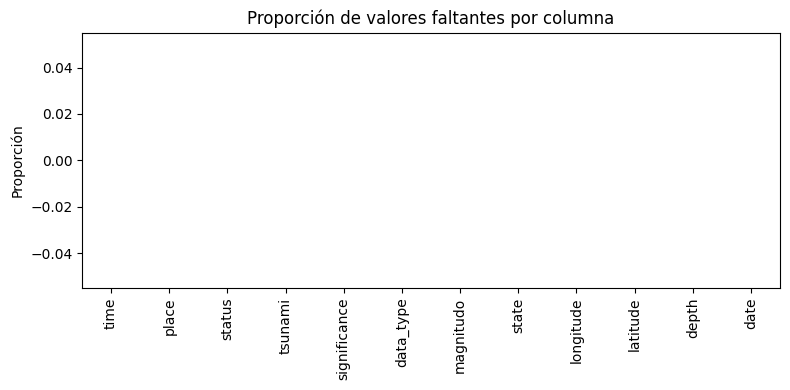

In [7]:
missing = df.isna().mean().sort_values(ascending=False)

print("Proporción de valores faltantes por columna:\n")
print(missing)

# Gráfico simple de faltantes
plt.figure(figsize=(8, 4))
missing.plot(kind="bar")
plt.title("Proporción de valores faltantes por columna")
plt.ylabel("Proporción")
plt.tight_layout()
plt.show()

Crear la variable objetivo _significant_

In [8]:
# Definimos sismo significativo según el índice de significancia
df["significant"] = (df["significance"] >= 100).astype(int)

df["significant"].value_counts()

significant
0    2728179
1     717551
Name: count, dtype: int64

Distribución de la variable objetivo

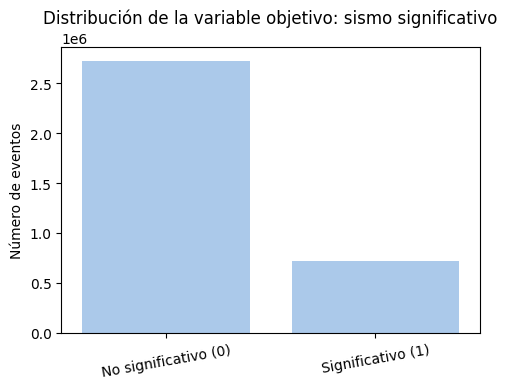

Conteos:
No significativo (0): 2728179
Significativo (1): 717551

Proporciones:
significant
no_significativo   0.792
significativo      0.208
Name: count, dtype: float64


In [9]:
counts = df["significant"].value_counts().sort_index()
labels = ["No significativo (0)", "Significativo (1)"]

plt.figure(figsize=(5, 4))
sns.barplot(x=labels, y=counts.values)
plt.title("Distribución de la variable objetivo: sismo significativo")
plt.ylabel("Número de eventos")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

print("Conteos:")
for label, value in zip(labels, counts.values):
    print(f"{label}: {value}")

print("\nProporciones:")
print((counts / counts.sum()).rename(index={0: "no_significativo", 1: "significativo"}))

Descripción de variables numéricas principales

In [10]:
numeric_cols = ["magnitudo", "tsunami", "longitude", "latitude", "depth", "significance"]

df[numeric_cols].describe()

,magnitudo,tsunami,longitude,latitude,depth,significance
count,3445730.000,3445730.000,3445730.000,3445730.000,3445730.000,3445730.000
mean,1.774,0.000,-101.288,37.465,22.851,74.009
std,1.291,0.021,76.973,20.415,54.832,101.636
min,-9.990,0.000,-180.000,-84.422,-4.700,0.000
25%,0.910,0.000,-146.427,34.064,3.120,13.000
50%,1.460,0.000,-118.954,37.936,7.700,33.000
75%,2.300,0.000,-115.928,47.848,16.120,81.000
max,9.100,1.000,180.000,87.386,699.000,2910.000


Histogramas de variables clave

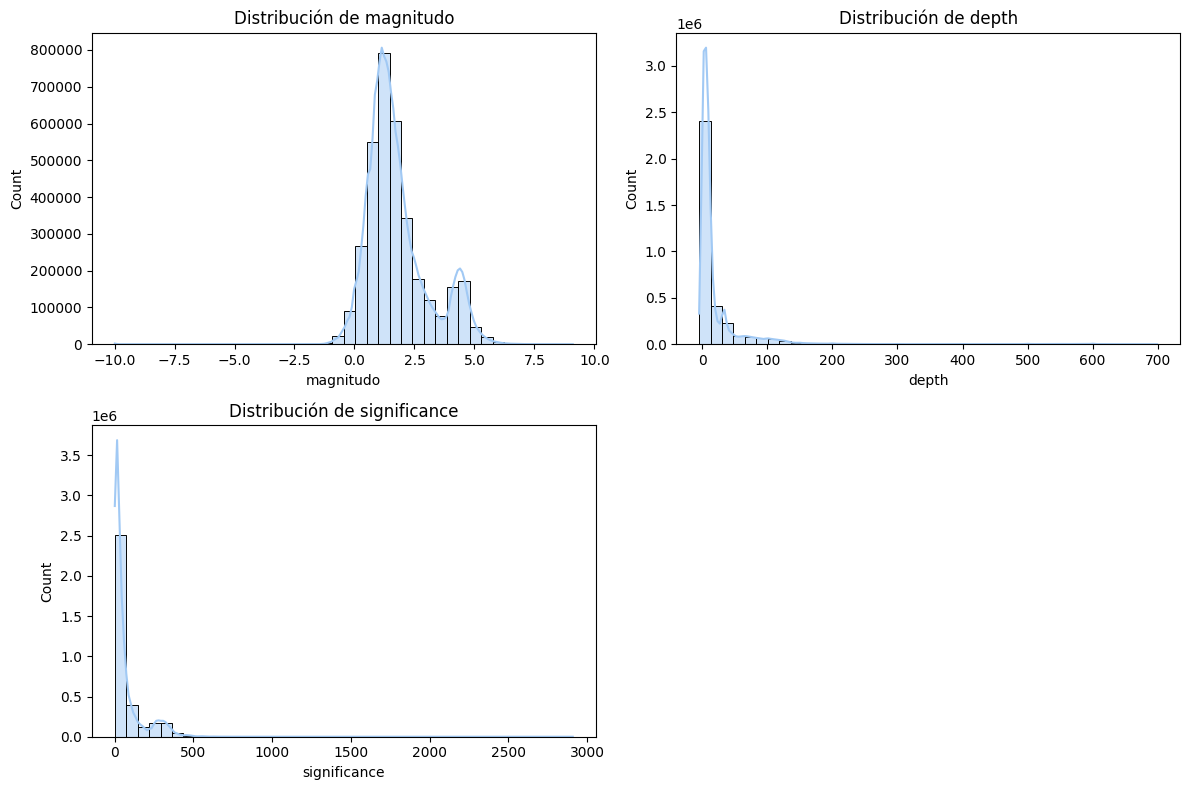

In [11]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(["magnitudo", "depth", "significance"], start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

Relación entre magnitud y significancia

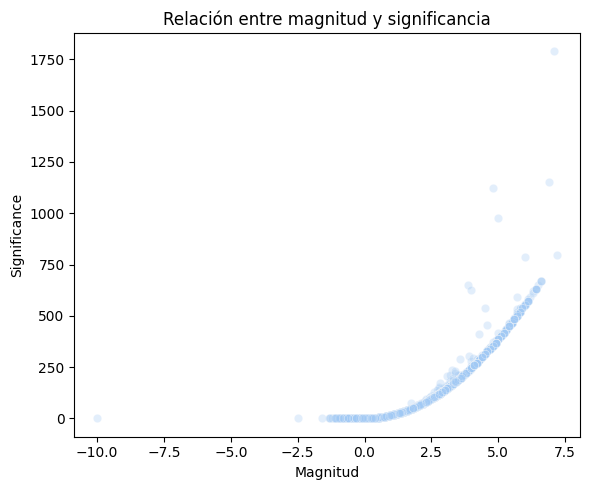

In [12]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df.sample(20000, random_state=42),  # muestra solo para que sea manejable
    x="magnitudo",
    y="significance",
    alpha=0.3,
)
plt.title("Relación entre magnitud y significancia")
plt.xlabel("Magnitud")
plt.ylabel("Significance")
plt.tight_layout()
plt.show()

Profundidad vs significancia

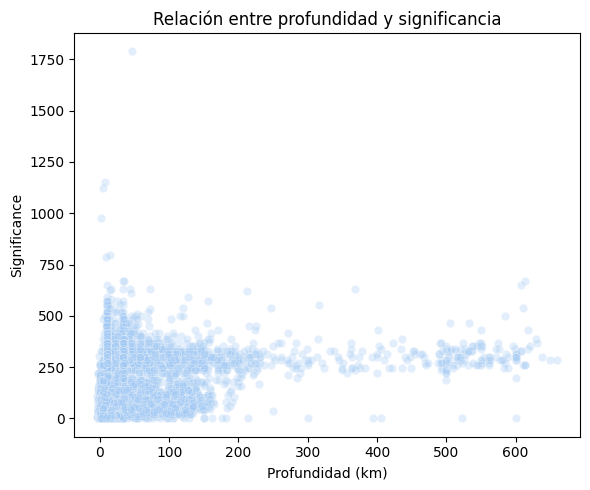

In [13]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df.sample(20000, random_state=42),
    x="depth",
    y="significance",
    alpha=0.3,
)
plt.title("Relación entre profundidad y significancia")
plt.xlabel("Profundidad (km)")
plt.ylabel("Significance")
plt.tight_layout()
plt.show()

Mapa de calor de correlaciones numéricas

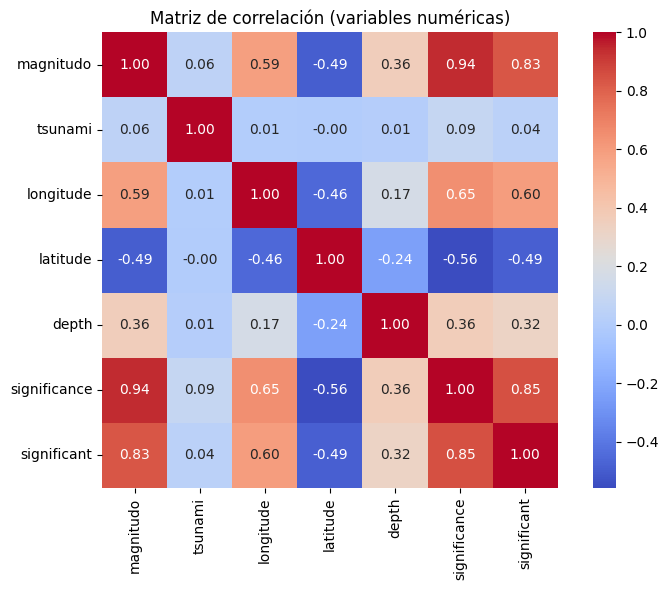

In [14]:
corr = df[numeric_cols + ["significant"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación (variables numéricas)")
plt.tight_layout()
plt.show()

Distribución de magnitud según sismo significativo

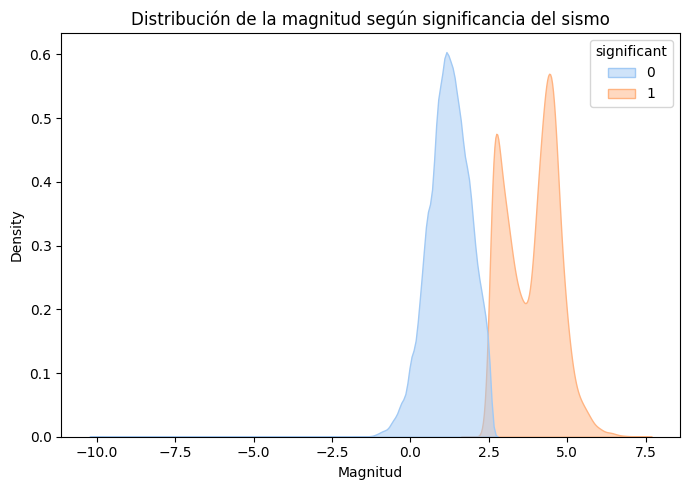

In [15]:
plt.figure(figsize=(7, 5))
sns.kdeplot(
    data=df.sample(50000, random_state=42),
    x="magnitudo",
    hue="significant",
    fill=True,
    common_norm=False,
    alpha=0.5,
)
plt.title("Distribución de la magnitud según significancia del sismo")
plt.xlabel("Magnitud")
plt.tight_layout()
plt.show()

## 3. Principales hallazgos del EDA

A partir del análisis exploratorio realizado se pueden resaltar varios puntos:

1. **Estructura del dataset**  
   - El conjunto de datos contiene más de 3 millones de registros de sismos entre 1990 y 2023.
   - Las variables clave para el problema son: magnitud, profundidad, coordenadas geográficas, indicador de tsunami y el índice de significancia del evento.

2. **Definición de sismo significativo**  
   - Se definió la variable binaria `significant` a partir de `significance >= 100`.
   - La distribución de clases muestra un desbalance (los eventos no significativos son más frecuentes), lo cual será importante para elegir métricas adecuadas en la fase de modelado.

3. **Comportamiento de las variables numéricas**  
   - La magnitud presenta la distribución esperada: muchos eventos de baja magnitud y pocos de magnitud alta.
   - La profundidad muestra algunos valores extremos, pero en general se concentra en rangos razonables para eventos sísmicos.
   - El índice de significancia tiene una cola larga: unos pocos eventos con valores muy altos.

4. **Relaciones entre variables**  
   - Existe una relación clara entre magnitud y significancia: a mayor magnitud, tiende a aumentar el índice de significancia.
   - También se aprecian patrones en profundidad y significancia, aunque menos marcados.
   - La matriz de correlación sugiere que la magnitud es una de las variables más relevantes para el problema.

5. **Implicaciones para el modelo**  
   - El desbalance de clases y la relación entre magnitud/significance justifican el uso de métricas como **F1-score**, además de la precisión global.
   - El conjunto de variables numéricas analizado es suficiente para construir un primer modelo de clasificación, que será refinado en el notebook de experimentación.

Este EDA permite conocer mejor los datos y fundamentar las decisiones que se tomarán en la fase de modelado supervisado.